In [1]:
!pip install alexnet_pytorch -upgrade


Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: -u


In [2]:
import os

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from AlexNet import alexnet
from test_model import test_model
from train_model import train_model

%matplotlib inline

In [3]:
if torch.cuda.is_available():
    device = "cuda:0"
elif torch.backends.mps.is_built():
    device = torch.device("mps")
else:
    device = "cpu"

In [4]:
data_transforms = {
    "train": transforms.Compose([transforms.ToTensor()]),
    "val": transforms.Compose([transforms.ToTensor()]),
    "test": transforms.Compose([transforms.ToTensor()]),
}

data_dir = "D:/Bhuvan Karthik/Downloads/tiny-imagenet-200/tiny-imagenet-200"
num_workers = {"train": 2, "val": 0, "test": 0}
image_datasets = {
    x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ["train", "val", "test"]
}
dataloaders = {
    x: torch.utils.data.DataLoader(image_datasets[x], batch_size=500, shuffle=True, num_workers=num_workers[x])
    for x in ["train", "val", "test"]
}
dataset_sizes = {x: len(image_datasets[x]) for x in ["train", "val", "test"]}

In [5]:
# Load AlexNet
torch.manual_seed(42)
model_ft = alexnet().to(device)

# Loss Function
criterion = nn.CrossEntropyLoss().to(device)
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
print(model_ft.parameters)

<bound method Module.parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=256, out_features=4096, bias=True)
    (2): ReLU(inpl

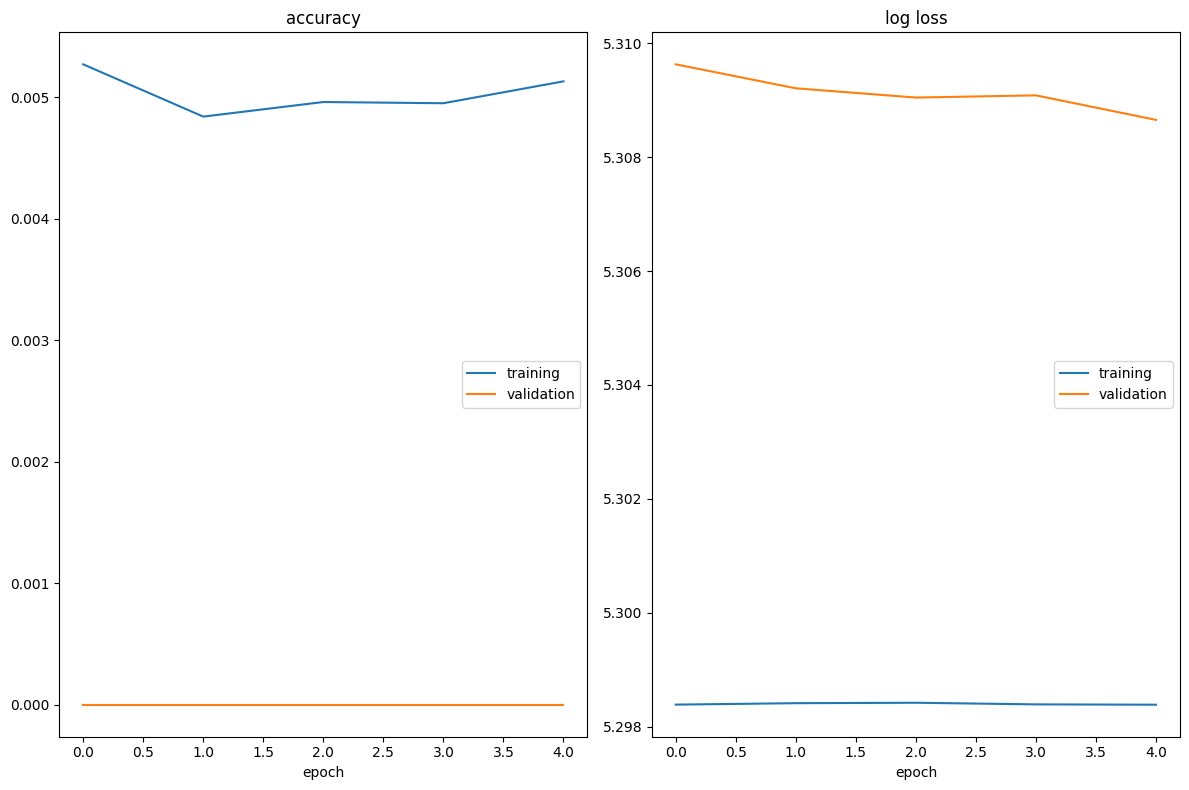

accuracy
	training         	 (min:    0.005, max:    0.005, cur:    0.005)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)
log loss
	training         	 (min:    5.298, max:    5.298, cur:    5.298)
	validation       	 (min:    5.309, max:    5.310, cur:    5.309)
Training complete in 494m 47s
Best Validation Accuracy: 0.0, Epoch: 0


0

In [6]:
# Train
train_model(
    output_path="Alex_not_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=5,
)

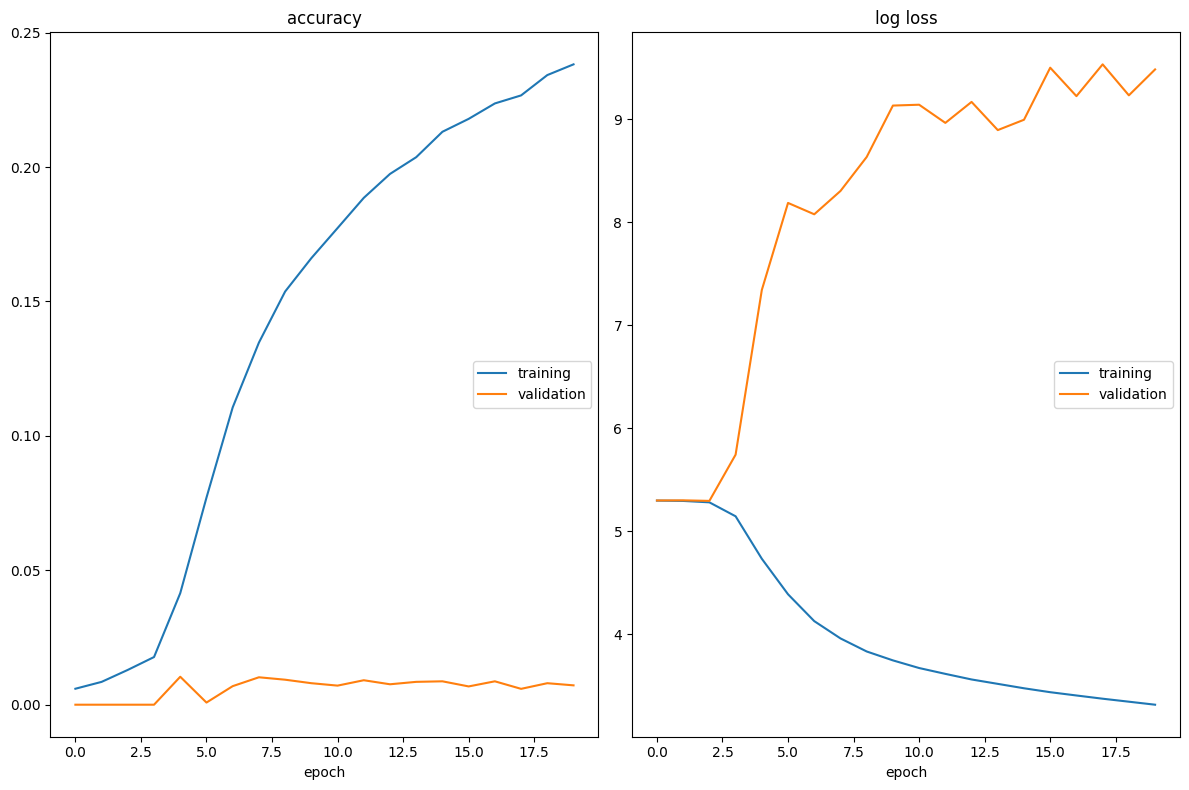

accuracy
	training         	 (min:    0.006, max:    0.238, cur:    0.238)
	validation       	 (min:    0.000, max:    0.010, cur:    0.007)
log loss
	training         	 (min:    3.317, max:    5.298, cur:    3.317)
	validation       	 (min:    5.295, max:    9.531, cur:    9.482)
Training complete in 293m 35s
Best Validation Accuracy: 0.010400000028312206, Epoch: 5


In [7]:
# Load AlexNet with pretrained weights
model_ft = alexnet(pretrained=True).to(device)

# Loss Function
criterion = nn.CrossEntropyLoss()
# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Train
best_epoch = train_model(
    output_path="Alex_pretrained",
    model=model_ft,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer_ft,
    device=device,
    num_epochs=20,
)

In [8]:
# Test
model_ft.load_state_dict(torch.load(f"models/Alex_pretrained/model_{best_epoch}_epoch.pt"))
test_model(model=model_ft, dataloaders=dataloaders, criterion=criterion, device=device)

Test Loss: 7.4418 Acc: 0.0086
Test complete in 3m 28s
